Dataset Loading,Visualization and Splitting into features and Labels

In [ ]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')
import random
!pip install --upgrade indic-nlp-library
!pip install textblob




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 14.6 MB/s eta 0:00:00


In [ ]:
# Loading the training dataset
df1 = pd.read_csv('/content/Hindi_Sentiment_Analysis - Sheet1 (1).csv')
df = df1.sample(frac=1).reset_index(drop=True)
df.head()

,Text,Sentiment_score
0,तुम खुशहाली के लिए अपनी सीमाओं को पार करते हो।,2
1,वह सभी को मुस्काने पर मजबूर कर देता है।,1
2,वह सभी की राय मानती है।,1
3,मेरी खुशी बढ़ रही है अपने संगीत के प्रगति से।,2
4,मैं खुश हूँ अपने प्रगति से।,2


In [ ]:
# Legnth of the training dataset
print(len(df))

1536


In [ ]:
# Splitting the dataset into features and labels
X = df['Text']
y = df['Sentiment_score']


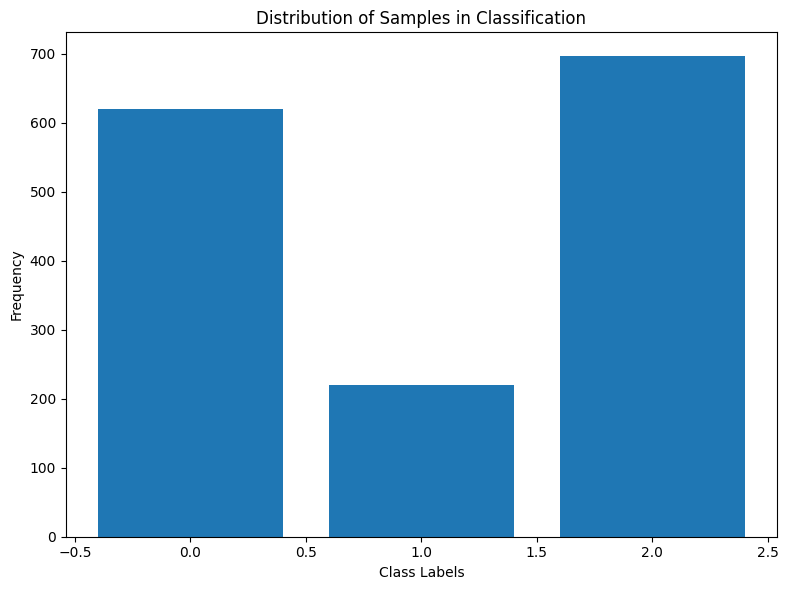

In [ ]:
# Visualizing our training dataset
import matplotlib.pyplot as plt

# Count the frequency of each class
label_counts = {}
for label in y:
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

# Extract the labels and frequencies for plotting
class_labels = list(label_counts.keys())
frequencies = list(label_counts.values())

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, frequencies)
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Samples in Classification')
plt.tight_layout()
plt.show()

# Therefore it can be seen that there is no class imbalance problem

Data Preprocessing Techniques
1.   Unicode Normalization
2.   Word Tokenization
3.   Remove unwanted spaces,punctuations,full-stops,inverted commas(single,double),special characters
4.   Removing English characters
5.   Lemmatization
6.   Stopwords Removal
7.   Feature Encoding





In [ ]:
# Unicode Normalization
import unicodedata
for i in range(0,len(X)):
  normalized_text = unicodedata.normalize('NFD', X[i])
  X[i] = normalized_text


<ipython-input-6-8cf68348c3ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = normalized_text


In [ ]:
print(X.head)

<bound method NDFrame.head of 0        मुझे तुम्हारी मदद की प्रशंसा करता हूं।
1        वह खुश है अपने संगीत की लोकप्रियता से।
2                 तुम्हारे आंदोलन में शक्ति है।
3                मैं नए अवसरों की खोज करता हूँ।
4           यह मेरे मन को अच्छा नहीं लग रहा है।
                         ...                   
1531          यह मेरे जीवन को रंगीन बना रहा है।
1532        यह मेरे जीवन में नई उमंग भर रहा है।
1533                   मेरे लिए सब कुछ अधीन है।
1534        मुझे इसके बारे में कोई राय नहीं है।
1535    उसे नई कला और संस्कृति की प्रवृत्ति है।
Name: Text, Length: 1536, dtype: object>


In [ ]:
# Remove unwanted spaces,punctuations,full-stops,inverted commas,special characters
punctuations = string.punctuation + '।'
for i in range(0,len(X)):
  clean_text = re.sub('[' + re.escape(punctuations) + ']', '', X[i])
  X[i] = clean_text


<ipython-input-7-b3867fad0c2f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = clean_text


In [ ]:
print(X.head)

<bound method NDFrame.head of 0      उसे सम्मानित महसूस हो रहा है अपनी कठिनाइयों के...
1                                     यह सब बेकार हो गया
2                  उसे स्वतंत्रता की कमी महसूस हो रही है
3                    वह अस्तित्व के लिए संघर्ष कर रहा है
4            वह मेरे सपनों को पूरा करने का सपना देखती है
                             ...                        
736                            तुम्हारी आत्मा में चमक है
737              मैं तुम्हारी मजबूती की प्रशंसा करता हूं
738                तुम्हारे मन की स्पष्टता बहुत अच्छी है
739                        यह मेरे लिए अनुभव की गहराई है
740                         मेरा जीवन एक अद्वितीय सफर है
Name: Text, Length: 741, dtype: object>


In [ ]:
# Removing English Characters from the dataset
for i in range(0,len(X)):
  hindi_text_clean = re.sub(r'[A-Za-z0-9]', '', X[i])
  X[i] = hindi_text_clean

<ipython-input-8-86cbb699c044>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = hindi_text_clean


In [ ]:
# Importing the list of stopwords
file_path = '/content/final_stopwords.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
lines = [line.strip() for line in lines]
print(lines)


['मैं', 'मुझको', 'मेरा', 'अपने आप को', 'हमने', 'हमारा', 'अपना', 'हम', 'आप', 'आपका', 'तुम्हारा', 'अपने आप', 'स्वयं', 'वह', 'इसे', 'उसके', 'खुद को', 'कि वह', 'उसकी', 'उसका', 'खुद ही', 'यह', 'इसके', 'उन्होने', 'अपने', 'क्या', 'जो', 'किसे', 'किसको', 'कि', 'ये', 'हूँ', 'होता है', 'रहे', 'थी', 'थे', 'होना', 'गया', 'किया जा रहा है', 'किया है', 'है', 'पडा', 'होने', 'करना', 'करता है', 'किया', 'रही', 'एक', 'लेकिन', 'अगर', 'या', 'क्यूंकि', 'जैसा', 'जब तक', 'जबकि', 'की', 'पर', 'द्वारा', 'के लिए', 'साथ', 'के बारे में', 'खिलाफ', 'बीच', 'में', 'के माध्यम से', 'दौरान', 'से पहले', 'के बाद', 'ऊपर', 'नीचे', 'को', 'से', 'तक', 'से नीचे', 'करने में', 'निकल', 'बंद', 'से अधिक', 'तहत', 'दुबारा', 'आगे', 'फिर', 'एक बार', 'यहाँ', 'वहाँ', 'कब', 'कहाँ', 'क्यों', 'कैसे', 'सारे', 'किसी', 'दोनो', 'प्रत्येक', 'ज्यादा', 'अधिकांश', 'अन्य', 'में कुछ', 'ऐसा', 'में कोई', 'मात्र', 'खुद', 'समान', 'इसलिए', 'बहुत', 'सकता', 'जायेंगे', 'जरा', 'चाहिए', 'अभी', 'और', 'कर दिया', 'रखें', 'का', 'हैं', 'इस', 'होता', 'करने', 'ने', 'बनी',

In [ ]:
# Stopwords removal from the dataset
from nltk.corpus import stopwords
for i in range(0,len(X)):
  tokens = word_tokenize(X[i])
  filtered_tokens = [word for word in tokens if word.casefold() not in lines]
  filtered_text = ' '.join(filtered_tokens)
  X[i] = filtered_text

<ipython-input-10-bae04eb4f3a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = filtered_text


In [ ]:
print(X.head)

<bound method NDFrame.head of 0                     मदद प्रशंसा
1            खुश संगीत लोकप्रियता
2                    आंदोलन शक्ति
3                   नए अवसरों खोज
4                मन अच्छा नहीं लग
                  ...            
1531               जीवन रंगीन बना
1532              जीवन नई उमंग भर
1533                         अधीन
1534                बारे राय नहीं
1535    नई कला संस्कृति प्रवृत्ति
Name: Text, Length: 1536, dtype: object>


In [ ]:
# Excel file of Non - Encoded data
X.to_excel('non_encoded.xlsx')

In [ ]:
# Feature Encoding using TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [ ]:
# Excel file of Encoded data
X.to_excel('viewing.xlsx')

Model Training and Testing

In [ ]:
# Using multinomial Naive Bayes Classifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your text data in a list 'corpus' and corresponding labels in a list 'labels'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the vectorizer on the training data and transform the data into feature vectors
X_train_vectorized = vectorizer.fit_transform(X_train)

# Create a Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the classifier on the training data
mnb.fit(X_train_vectorized, y_train)

# Transform the test data into feature vectors
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the test data
y_pred = mnb.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)



Accuracy: 0.672077922077922
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.68      0.71       116
           1       0.83      0.10      0.18        50
           2       0.63      0.87      0.73       142

    accuracy                           0.67       308
   macro avg       0.73      0.55      0.54       308
weighted avg       0.70      0.67      0.63       308



In [ ]:
# Using SupportVector Machine classifer
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Preprocess your data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train an SVM classifier
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train_vectorized, y_train)

# Predict using the trained classifier
y_pred = svm_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6948051948051948
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.84      0.73       116
           1       0.53      0.16      0.25        50
           2       0.75      0.77      0.76       142

    accuracy                           0.69       308
   macro avg       0.65      0.59      0.58       308
weighted avg       0.68      0.69      0.67       308



In [ ]:
# Using Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Preprocess your data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_vectorized, y_train)

# Predict using the trained classifier
y_pred = rf_classifier.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.7435064935064936
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77       116
           1       0.69      0.18      0.29        50
           2       0.79      0.85      0.82       142

    accuracy                           0.74       308
   macro avg       0.73      0.63      0.62       308
weighted avg       0.74      0.74      0.71       308



In [ ]:
# Using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have your feature vectors X and labels y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test)

# Initialize the logistic regression model
lr = LogisticRegression()

# Train the model
lr.fit(X_train_vectorized, y_train)

# Predict on the testing data
y_pred = lr.predict(X_test_vectorized)

# Evaluate the model
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)


Accuracy: 0.7012987012987013


In [ ]:
# Using Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test)

# Create the GBM model
gbm = GradientBoostingClassifier()

# Fit the model to the training data
gbm.fit(X_train_vectorized, y_train)

# Make predictions on the test data
y_pred = gbm.predict(X_test_vectorized)

# Evaluate the model
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)


Accuracy: 0.6525974025974026


In [ ]:
# Using Ensemble classifier
from sklearn.ensemble import VotingClassifier

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[('mnb', mnb), ('svc', svm_classifier),('rf', rf_classifier),('lr',lr),('gbm',gbm)], voting='hard')

# Fit the Voting Classifier to the training data
voting_clf.fit(X_train_vectorized, y_train)

# Predict the class probabilities for the test data
#y_pred_proba = voting_clf.predict_proba(X_test_vectorized)

# Make predictions on the test data
y_pred = voting_clf.predict(X_test_vectorized)

# Evaluate the model
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)




Accuracy: 0.7175324675324676


Designing the User Interface in Tkinter in Visual Studio code
